# Interpretacion de modelos

## PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, responder algunas o todas las siguientes preguntas:

¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?



- **Para usar esta seccion  correr las siguientes celdas donde se importan las APIs, luego se descarga el dataset preprocesado y se reduce su dimensionalidad** 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.decomposition import PCA

from sklearn.model_selection import learning_curve


In [2]:
df_model=pd.read_csv('C:/Users/Octavio/Documents/CURSOS/DATA SCIENCE/Proyecto/DS_Proyecto_Datos_Properati_procesados.csv')
df_model=df_model.drop(columns='Unnamed: 0')

In [3]:
X=df_model.drop(columns=['price'])
y=df_model[['price']]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=50)

In [5]:
n=9
pca = PCA(n_components=n)
X_train_new=pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)
X_train=pd.DataFrame(X_train_new,index=X_train.index,columns=np.arange(1,n+1))
X_test=pd.DataFrame(X_test_new,index=X_test.index,columns=np.arange(1,n+1))

Analisis PCA de cada variable para poder interpretar los coeficientes de cada modelo.

In [ ]:
n=9
components_pc=pd.DataFrame(data=pca.components_,columns=X.columns,index=np.arange(1,n+1))
components_pc=components_pc.transpose()

for i in np.arange(1,n+1):
    pc=components_pc.sort_values(by=i,ascending=False).abs().iloc[0:5,i-1]

    print('PC ' , i)
    print(pc)
    plt.bar(x=pc.index,height=pc)
    plt.xticks(rotation=45)
    plt.show()


### Analisis Regresion Lineal


Primero aplicamos Polynomial Features a nuestro dataset y generamos nuevas variables, 
Con esas variables entrenamos el modelo de Regresion lineal. 

In [9]:
poly = PolynomialFeatures(degree = 2, include_bias=False)
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)
reg_lasso = Lasso(alpha= 1.5,tol=0.001)
reg_lasso.fit(X_train_new,y_train)

C:\Users\Octavio\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14289655068195.031, tolerance: 1545592172419.1614
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1.5, tol=0.001)

Para entender que hace Polynomial features generamos un mapa de calor que nos explica.
- Si tiene 2 es porque a esa variable la elevo a la potencia 
- Si tiene 1 en dos variables es porque las multiplico.

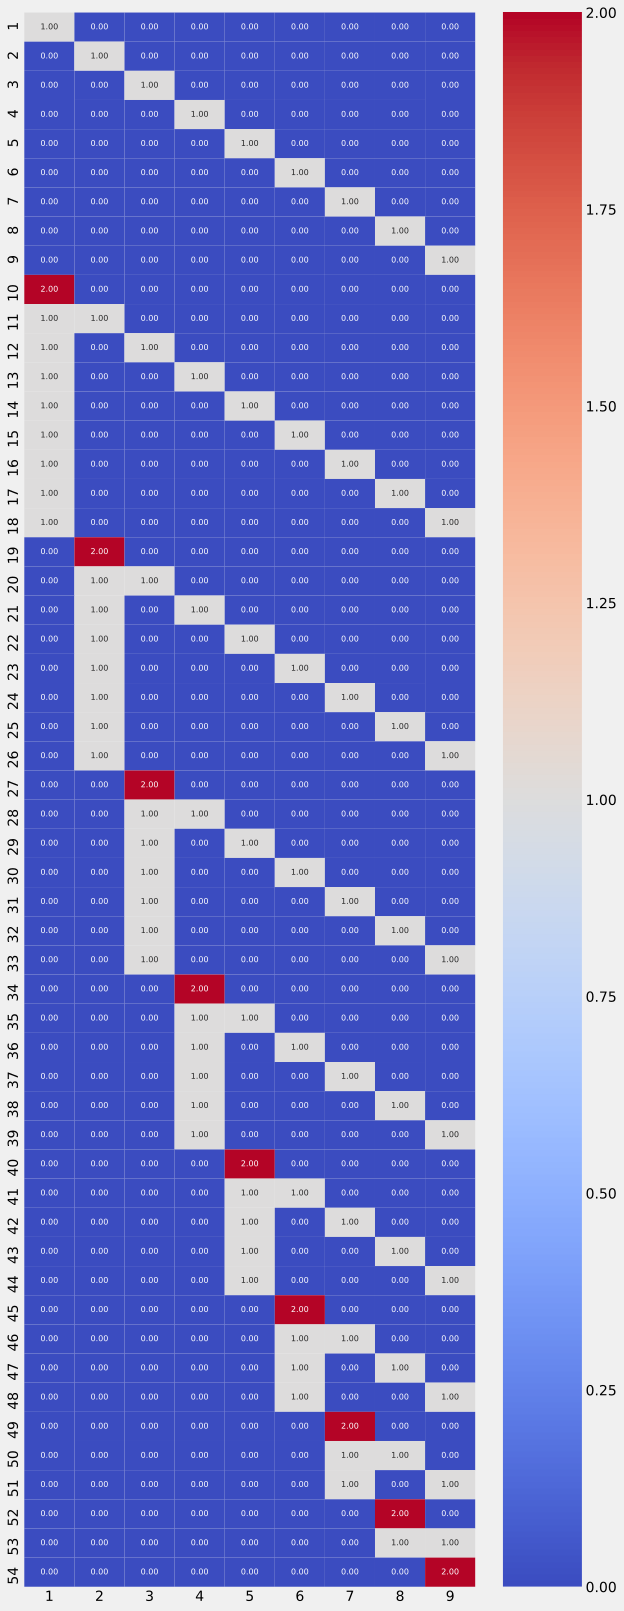

In [10]:
powers=pd.DataFrame(poly.powers_,index=np.arange(1,poly.powers_.shape[0]+1),columns=np.arange(1,poly.powers_.shape[1]+1))
plt.figure(figsize=[9,27])
sns.heatmap(powers, cbar = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
           xticklabels= powers.columns, 
           yticklabels= powers.index,
           cmap= 'coolwarm')
plt.show()

Ahora realizamos un grafico con los coeficientes en valor absoluto por variable. 
Mientras mas alto el coeficiente mas "pendiente" tiene esa variable y mas "importante" es.

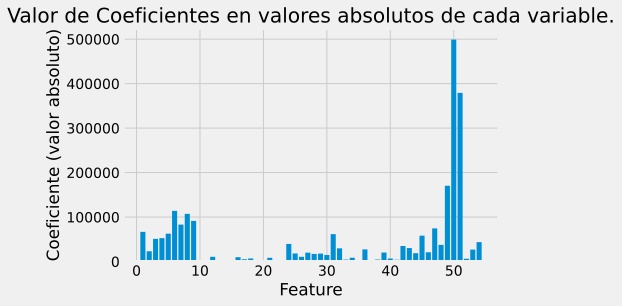

In [86]:
plt.title('Valor de Coeficientes en valores absolutos de cada variable.')
plt.bar(x=np.arange(1,reg_lasso.coef_.size+1),height=np.abs(reg_lasso.coef_))
plt.xlabel('Feature')
plt.ylabel('Coeficiente (valor absoluto)')
plt.show()

- Vemos que la mayoria de las primeras 9 variables tienen coeficientes significativos (menos la 2)

- Entre la variable 10 a la 48 los coeficientes son insignificantes o minimos en algunos casos ( en el cuadro que explican las variables vemos que esats variables son las variables [2,3,4,5,6] al cuadrado y sus interacciones (multiplicacion) con las otras variables restantes.

- **Luego obtenemos las variables mas significantes: 49,50 y 51. Estas variables es la variable 7 al cuadrado, la var 7 * var 8 y var 7 * var 9.** Como no sabemos que significa la variable 7, 8 y 9 recurrimos al analisis PCA realizado previamente para entender:

    - *Variable 7* :
        - l3_Palermo                    0.927218
        - property_type_Departamento    0.092179
        - rooms_rescalado               0.023074

    - *Variable 8* :
        - l3_Almagro                    0.638768
        - surface_total_rescalado       0.431640
        - bedrooms_rescalado            0.164778

    - *Variable 9*:
        - surface_total_rescalado    0.444148
        - l3_Villa Crespo            0.250592
        - bedrooms_rescalado         0.167258
        
- **Tenemos que la variable con mayor coeficiente es la var 7 * var 8.**


### Analisis RandomForest

Entrenamos el modelo

In [18]:
regr=RandomForestRegressor(max_depth=150, n_estimators=96)
regr.fit(X_train,np.ravel(y_train))

RandomForestRegressor(max_depth=150, n_estimators=96)

C:\Users\Octavio\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


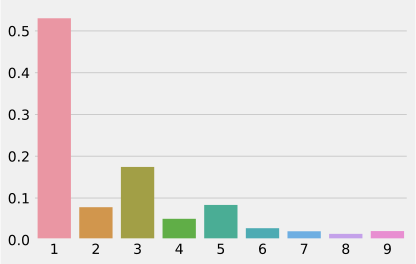

In [21]:
importances = regr.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]


sns.barplot(columns[indices], importances[indices])
plt.show()

La variable 1 es la mas importante para el modelo Random Forest. Esto se refiere que las siguientes variables del dataset original influyen mas en la prediccion:
- PC  1
    - surface_covered_rescalado    0.470991
    - rooms_rescalado              0.462355
    - bedrooms_rescalado           0.458699
    - surface_total_rescalado      0.448903
    - bathrooms_rescalado          0.383016


1) Elegimos un arbol al azar y comprobamos que esta overfitteado
2) Elegimos 3 arboles al azar y vemos cuales son sus variables mas importantes, comprabando que son distintas, ya que eso es lo que hace el modelo Random Forest.

In [31]:
regr_tree = regr.estimators_[5]
y_train_pred = regr_tree.predict(X_train)
y_test_pred = regr_tree.predict(X_test)
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

41798.25323555081
70882.1682494504


In [38]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,), dtype={int, float}
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

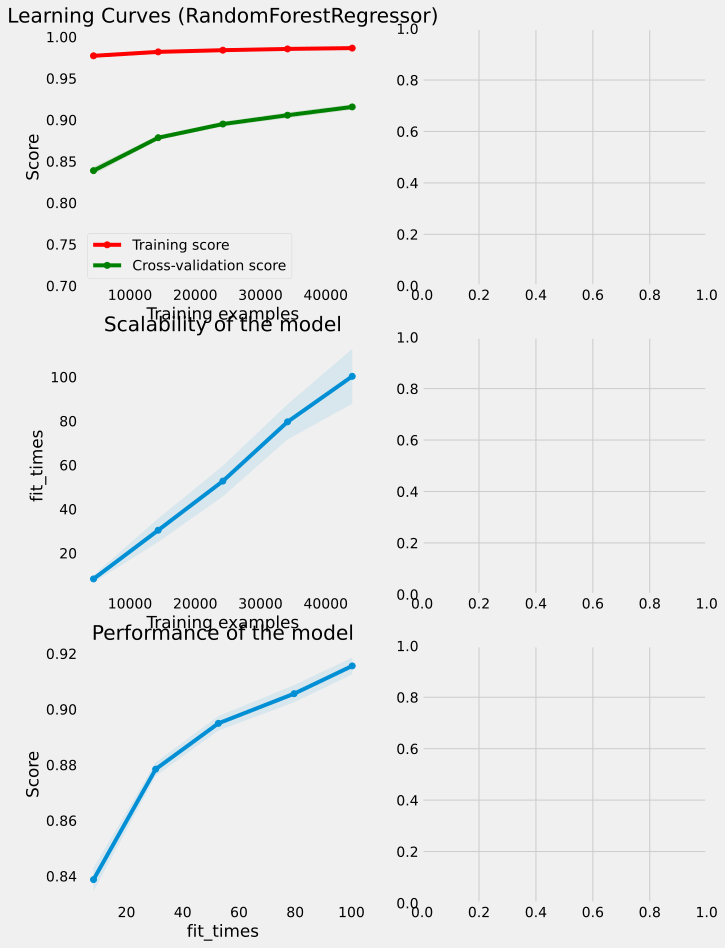

In [45]:
fig, axes = plt.subplots(3, 1, figsize=(10, 25))

title = "Learning Curves (RandomForestRegressor)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = RandomForestRegressor(max_depth=150, n_estimators=96)
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)

plt.show()

### Analisis distribucion de errores en modelo:

Realizamos el analisis para RANDOM FOREST que es el modelo con el mejor desempeño

In [ ]:
regr=RandomForestRegressor(max_depth=150, n_estimators=96)
regr.fit(X_train,np.ravel(y_train))
y_train_pred=regr.predict(X_train)
y_test_pred=regr.predict(X_test)

In [8]:
errores_train=y_train_pred-np.ravel(y_train)
errores_test=y_test_pred-np.ravel(y_test)

In [9]:
y_train_pred=pd.Series(y_train_pred,index=y_train.index)
y_test_pred=pd.Series(y_test_pred,index=y_test.index)

Agregamos una columna Erorres que es la resta de la y real y la y predicha

In [16]:
X_train['y']=y_train
X_train['y_pred']=y_train_pred
X_train['errores']=X_train['y']-X_train['y_pred']
X_train

1         2         3         4         5         6         7  \
33132 -1.875696 -0.071629  0.244688  0.122131 -0.013523  0.114934 -0.171171   
11273 -0.390136 -0.284173  0.186471 -0.545981  0.004686  0.269698 -0.047477   
54999 -1.725663 -1.116203 -0.593220  0.090794  0.179373  0.008779 -0.126339   
9630   1.496047  0.283211 -0.782986 -0.445601 -0.660242 -0.021912  0.820302   
22546  0.907096 -0.890049  1.752451  1.169479  0.066751  0.416863  0.146763   
...         ...       ...       ...       ...       ...       ...       ...   
55366  1.785262  2.275505  0.044916 -0.390652 -0.210084  0.185351 -0.071432   
59358  0.199053  1.086933 -0.451882  0.287934 -0.484313  0.015602 -0.133628   
48417 -1.518966 -0.216388 -0.968496 -0.036883  0.470156  0.078474 -0.327084   
22637  2.590213 -1.287965 -0.582376 -1.035622 -1.140125  0.163735 -0.056533   
14000 -1.622315  2.009347 -0.663271 -0.219149  0.452480  0.050584 -0.218364   

              8         9         y         y_pred       errores  
33132 -0.316440  0.232507   82000.0   88937.576593  -6937.576593  
11273 -0.051509  0.021758  205000.0  211935.935191  -6935.935191  
54999 -0.057142  0.040826   97000.0   99334.674224  -2334.674224  
9630  -0.019511 -0.050266  149000.0  160406.250000 -11406.250000  
22546  0.100873  0.097779  250000.0  247912.361111   2087.638889  
...         ...       ...       ...            ...           ...  
55366  0.584950  0.603344  285000.0  335910.437500 -50910.437500  
59358  0.049528  0.077153  245000.0  255605.381944 -10605.381944  
48417 -0.301941 -0.010891  194000.0  185963.541667   8036.458333  
22637 -0.004096  0.157785  220000.0  218865.252976   1134.747024  
14000  0.136150  0.135179  155000.0  155444.444444   -444.444444  

[55076 rows x 12 columns]

In [11]:
X_test['y']=y_test
X_test['y_pred']=y_test_pred
X_test['errores']=X_test['y']-X_test['y_pred']

Unificamos los Dataframe para hacer un analisis mas profundo 

In [12]:
df=pd.concat([X_train,X_test])

In [15]:
df[['errores']].describe()

errores
count   78681.000000
mean     -504.901440
std     30396.402184
min   -939503.472222
25%     -5976.293299
50%         0.000000
75%      4076.927083
max    991058.045511

In [19]:
df['errores_abs']=np.abs(df.errores)

In [22]:
df[['errores_abs']].describe()

errores_abs
count   78681.000000
mean    13280.976068
std     27346.108084
min         0.000000
25%      1406.250000
50%      5034.722222
75%     13911.190972
max    991058.045511

(0.0, 500000.0)

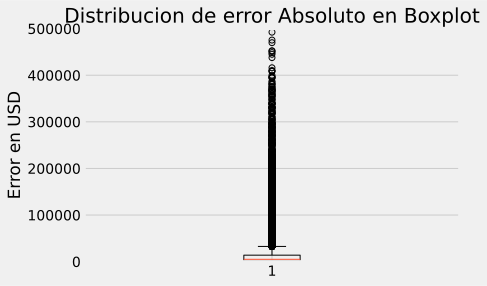

In [33]:
plt.title('Distribucion de error Absoluto en Boxplot')
plt.boxplot(df.errores_abs)
plt.ylabel('Error en USD')
plt.ylim(0,500000)

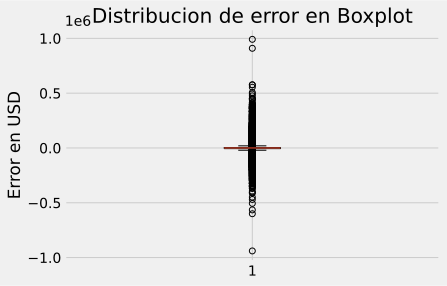

In [34]:
plt.title('Distribucion de error en Boxplot')
plt.boxplot(df.errores)
plt.ylabel('Error en USD')
plt.show()

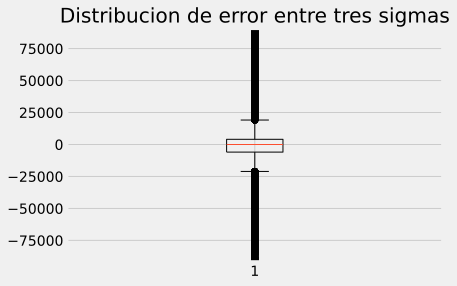

In [35]:
maxim=df.errores.mean() + 3 * df.errores.std() 
minim=df.errores.mean() - 3 * df.errores.std()
plt.title('Distribucion de error entre tres sigmas')
plt.boxplot(df.errores)
plt.ylim(minim,maxim)
plt.show()

Analizaremos los casos que estan por fuera de los limites de error, es decir que tienen un error significativo

In [40]:
errores_grandes=df[np.logical_or(df['errores']<=minim,df['errores']>=maxim)]

In [42]:
errores_grandes.shape

(1517, 13)

Este dato es importante porque podemos ver que solo 1517 (1.8%) instancias tienen errores mayores o menores a 3 Desvios, lo que implica que los errores obtenidos en la mayoria de los casos son aceptables.